In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from sympy import Symbol
import random as rd
plt=reload(plt)

## Исходная функция

In [2]:
def fn(x):
    return x**2 + np.sin(x)

In [44]:
a = int(input('Введите левую границу a: '))
b = int(input('Введите правую границу b: '))

fun_vals = []
eps = 10
x, y = [], []
interval = np.linspace(a, b, 100)

# Генерируем приближенные значения функции в абсциссах
for i in interval:
    fun_vals.append(fn(i) + ((-1)**(rd.randint(-1, 1)))*2*np.cos(i))
    x.append(i)
    
x = np.array(x, float)    
y = np.array(fun_vals, float)

# print('Множество абсцисс: ', x)
# print('Множество ординат: ', y)

n = int(input('Введите Степень многочлена для МНК n (она должна быть меньше числа точек из входных данных!): '))

Введите левую границу a: -1
Введите правую границу b: 1
Введите Степень многочлена для МНК n (она должна быть меньше числа точек из входных данных!): 2


## Нормальные уравнения

![jupyter](./1.jpeg)

matrixA: [[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00 -9.79797980e-01  9.60004081e-01]
 [ 1.00000000e+00 -9.59595960e-01  9.20824406e-01]
 [ 1.00000000e+00 -9.39393939e-01  8.82460973e-01]
 [ 1.00000000e+00 -9.19191919e-01  8.44913784e-01]
 [ 1.00000000e+00 -8.98989899e-01  8.08182838e-01]
 [ 1.00000000e+00 -8.78787879e-01  7.72268136e-01]
 [ 1.00000000e+00 -8.58585859e-01  7.37169677e-01]
 [ 1.00000000e+00 -8.38383838e-01  7.02887460e-01]
 [ 1.00000000e+00 -8.18181818e-01  6.69421488e-01]
 [ 1.00000000e+00 -7.97979798e-01  6.36771758e-01]
 [ 1.00000000e+00 -7.77777778e-01  6.04938272e-01]
 [ 1.00000000e+00 -7.57575758e-01  5.73921028e-01]
 [ 1.00000000e+00 -7.37373737e-01  5.43720029e-01]
 [ 1.00000000e+00 -7.17171717e-01  5.14335272e-01]
 [ 1.00000000e+00 -6.96969697e-01  4.85766758e-01]
 [ 1.00000000e+00 -6.76767677e-01  4.58014488e-01]
 [ 1.00000000e+00 -6.56565657e-01  4.31078461e-01]
 [ 1.00000000e+00 -6.36363636e-01  4.04958678e-01]
 [ 1.00000000e+00 -6.1

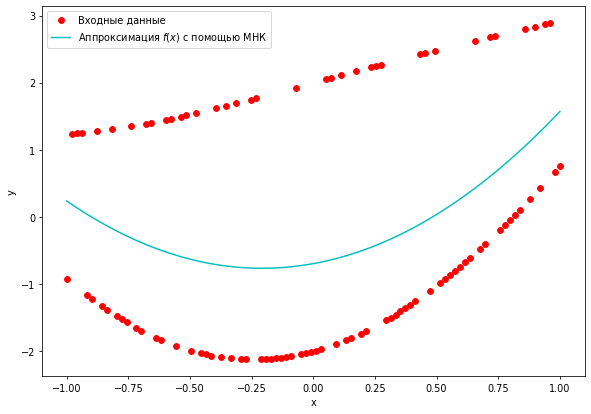

In [45]:
# рассматриваем многочлен: y = c0 + c1(x) + c2(x**2) +...+ cn(x**n)

pts = len(x) # число точек во входных данных
polyval = [] # здесь будем хранить poly fit values

if n+1 > pts:
    print('Внимание: Степень многочлена должга быть меньше числа точек из входных данных')
    print('Проверьте правильность введенных данных')
    sys.exit()

# Реализация МНК
else:
    matrixA = np.zeros((pts, n + 1)) # создаем матрицу А, матрицу Вандермонда
    matrixB = np.zeros((pts, 1)) # создаем матрицу B

    # loop to populate arrays
    for i in range(pts):
        matrixB[i][0] = y[i]
        for j in range(n + 1):
            matrixA[i][j] = (x[i])**j

    print('matrixA:',matrixA)
    print('matrixB:',matrixB)
    # Нормальные уравнения (A^T)Ax=(A^T)b
    At = np.transpose(matrixA) # A transpose (A^T)
    AtA = np.dot(At, matrixA) # matrix multiply (A^T)A
    AtB = np.dot(At, matrixB) # matrix multiply (A^T)b
    coeff = np.linalg.solve(AtA, AtB) # solve normal equation (A^T)Ax=(A^T)b

    # get y-fit values
    for i in range(pts):
        yval = 0
        for j in range(n + 1):
            yval = yval + coeff[j, 0]*(x[i])**j # gets new y value using fit coeffs
        polyval.append(yval) # collect new y values

    def approximation(arg):
        arg = Symbol('x')
        function = 0
        for i in range(pts):
            function += polyval[i] * arg**i
        return function
    
#     print(approximation(10))
    # Стандартное отклонение
    error = y - polyval
    sumval = np.sum(error**2)
    stddev = (sumval/(pts - (n + 1)))**0.5

    # Коэффициенты корреляции of fit as alternate "goodness of fit"
    ymean = np.sum(y)/pts
    sumfit = np.sum((y - ymean)**2)
    rvalue = ((sumfit - sumval)/sumfit)**0.5

    # Визуализация
    plt.figure(figsize=(10, 7), dpi=70)
    plt.plot(x, y, 'ro', label='Входные данные')
    plt.plot(x, polyval, 'c-', label='Аппроксимация $f(x)$ с помощью МНК')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=2)

    
    print('\nКоэффициенты многочлена:')
    for i in coeff.flatten():
        print(i)
    print('\nСтандартное отклонение: ', stddev)
    print('\nКоэффициент корреляции: ', rvalue)